### Models Evaluation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn import dummy
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df = pd.read_csv('cwk_data_20549904.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,duration,campaign,pdays,previous,poutcome,y
0,37,blue-collar,married,secondary,no,342,yes,no,cellular,12,340,2,175,1,failure,no
1,53,technician,divorced,secondary,no,392,yes,no,cellular,28,70,1,245,1,failure,no
2,59,unknown,married,unknown,no,3940,no,no,unknown,5,48,2,-1,0,unknown,no
3,31,blue-collar,single,secondary,no,334,yes,yes,unknown,2,425,2,-1,0,unknown,no
4,74,retired,married,tertiary,no,1843,no,no,cellular,15,192,1,185,2,success,yes


In [3]:
df['y'] = [0 if x == 'no' else 1 for x in df['y']]

df_input = df.iloc[:,:-1]
df_output = df.iloc[:,-1]

df_input = pd.get_dummies(df_input, dtype=int)

X = df_input
y = df_output

#### 1. Dummy Classifier (Point model)

In [4]:
#-- setup our training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y)

#-- create a dummy classifier as our baseline
dc = dummy.DummyClassifier()

#-- Fit the model on the training set
dc.fit(X_train, Y_train)

#-- Obtain the score (performance) of our classifier
#-- on the testing set
score = dc.score(X_test, Y_test)

#-- print the results
print("Baseline Accuracy:", score)
print(len(y.values))

Baseline Accuracy: 0.7841666666666667
4000


In [5]:
y_pred_dc = dc.predict(X_test)
print(classification_report(Y_test,y_pred_dc))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88       941
           1       0.00      0.00      0.00       259

    accuracy                           0.78      1200
   macro avg       0.39      0.50      0.44      1200
weighted avg       0.61      0.78      0.69      1200



C:\Users\Prajakta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Prajakta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Prajakta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

#### 2. Naive Bayes Classifier

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
# Create a Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the classifier
nb_classifier.fit(X_train_scaled, y_train)

GaussianNB()

In [8]:
nb_classifier.get_params()

{'priors': None, 'var_smoothing': 1e-09}

Accuracy: 0.7783333333333333

Confusion Matrix:
 [[775 166]
 [100 159]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.82      0.85       941
           1       0.49      0.61      0.54       259

    accuracy                           0.78      1200
   macro avg       0.69      0.72      0.70      1200
weighted avg       0.80      0.78      0.79      1200



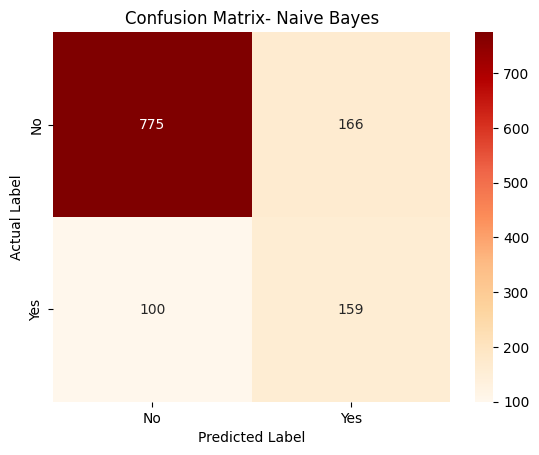

In [9]:
y_pred_nb = nb_classifier.predict(X_test_scaled)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred_nb)
classification_rep = classification_report(y_test, y_pred_nb)
conf_matrix = confusion_matrix(y_test, y_pred_nb)

# Print the results
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)

class_label = ["No", "Yes"]
df_cm = pd.DataFrame(conf_matrix, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True,  fmt = "d",cmap='OrRd')
plt.title("Confusion Matrix- Naive Bayes")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

#### 3. Decision Tree Classifier

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify =y)

dt_classifier = DecisionTreeClassifier(random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV
grid_search = GridSearchCV(dt_classifier, param_grid, scoring='recall', cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}


Accuracy: 0.8016666666666666

Confusion Matrix:
 [[828 113]
 [125 134]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.88      0.87       941
           1       0.54      0.52      0.53       259

    accuracy                           0.80      1200
   macro avg       0.71      0.70      0.70      1200
weighted avg       0.80      0.80      0.80      1200



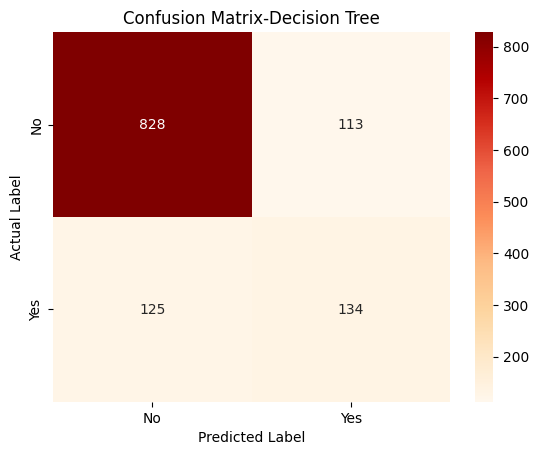

In [11]:
# Train the decision tree classifier with the best parameters
best_dt_classifier = DecisionTreeClassifier(random_state=42, **best_params)
best_dt_classifier.fit(X_train, y_train)

y_pred_dt = best_dt_classifier.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred_dt)
conf_matrix = confusion_matrix(y_test, y_pred_dt)
classification_rep = classification_report(y_test, y_pred_dt)

# Print the results
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)

class_label = ["No", "Yes"]
df_cm = pd.DataFrame(conf_matrix, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True,  fmt = "d",cmap='OrRd')
plt.title("Confusion Matrix-Decision Tree")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

#### 4. Random Forest Classifier

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y)
rf_classifier = RandomForestClassifier(random_state=42)
# Define hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]  # Tuning max_features
}

# Create StratifiedKFold for cross-validation
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create GridSearchCV
grid_search = GridSearchCV(rf_classifier, param_grid, cv=stratified_kfold, scoring='recall', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)
# Get the best model from the grid search
best_rf_model = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}


Accuracy: 0.8591666666666666

Confusion Matrix:
 [[879  62]
 [107 152]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91       941
           1       0.71      0.59      0.64       259

    accuracy                           0.86      1200
   macro avg       0.80      0.76      0.78      1200
weighted avg       0.85      0.86      0.85      1200



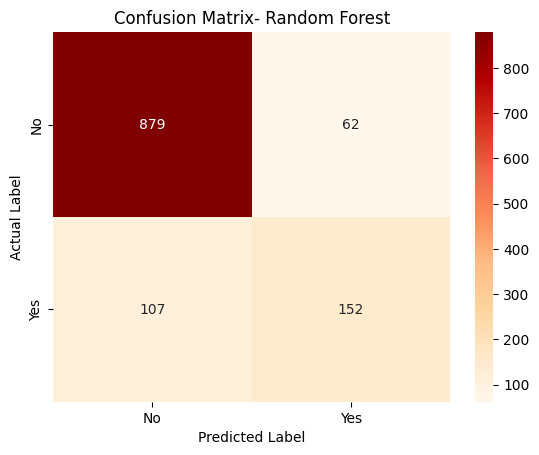

In [13]:
y_pred_rf = best_rf_model.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred_rf)
conf_matrix = confusion_matrix(y_test, y_pred_rf)
classification_rep = classification_report(y_test, y_pred_rf)

# Print the results
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)

class_label = ["No", "Yes"]
df_cm = pd.DataFrame(conf_matrix, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True,  fmt = "d",cmap='OrRd')
plt.title("Confusion Matrix- Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

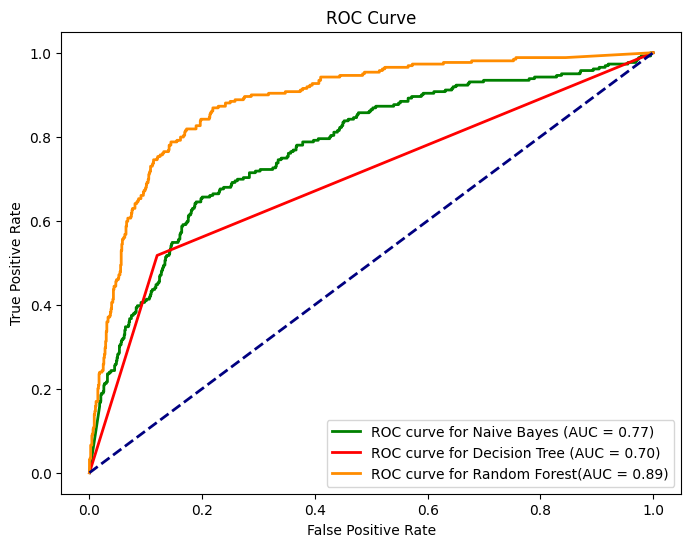

In [14]:
## Naive Bayes
# Make predictions on the test set
y_prob_nb = nb_classifier.predict_proba(X_test_scaled)[:, 1]
# Calculate ROC curve and AUC
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_prob_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)

## Decision Tree
# Predict probabilities on the test set
y_probs_dt = best_dt_classifier.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_probs_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

## Random Forest
# Make predictions on the test set
y_prob_rf = best_rf_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)



# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, color='green', lw=2, label='ROC curve for Naive Bayes (AUC = {:.2f})'.format(roc_auc_nb))
plt.plot(fpr_dt, tpr_dt, color='red', lw=2, label='ROC curve for Decision Tree (AUC = {:.2f})'.format(roc_auc_dt))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='ROC curve for Random Forest(AUC = {:.2f})'.format(roc_auc_rf))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()